# Required modules

In [2]:
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from collections import Counter

In [3]:
#set theme
sns.set_style("darkgrid")

In [4]:
#ignore warnings
warnings.filterwarnings('ignore')

#Question 1

## Task-1

In [5]:
#import data
dataset = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

#### Performing initial data visualisation

In [6]:
#overall lookout of the data
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [8]:
#description of the dataset
print(dataset.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### Data Preprocessing

**Missing values**

In [9]:
#check for missing values
print("Percentage of missing values:")
print(((dataset.isna().sum())/dataset.shape[0])*100)

Percentage of missing values:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


In [10]:
#age
print(round(dataset.groupby(['Sex', 'Pclass'])['Age'].agg(['mean']), 0))#age

               mean
Sex    Pclass      
female 1       35.0
       2       29.0
       3       22.0
male   1       41.0
       2       31.0
       3       27.0


In [12]:
#to access missing values
dataset["Age"] = dataset["Age"].fillna(-1)

#loop to handle missing values
for data_index in range(dataset.shape[0]):
  if dataset["Age"][data_index] == -1:
    if ((dataset["Sex"][data_index] == "female") and (dataset["Pclass"][data_index] == 1)):
      dataset["Age"][data_index] = 35
    elif((dataset["Sex"][data_index] == "female") and (dataset["Pclass"][data_index] == 2)):
      dataset["Age"][data_index] = 29
    elif((dataset["Sex"][data_index] == "female") and (dataset["Pclass"][data_index] == 3)):
      dataset["Age"][data_index] = 22
    elif((dataset["Sex"][data_index] == "male") and (dataset["Pclass"][data_index] == 1)):
      dataset["Age"][data_index] = 41
    elif((dataset["Sex"][data_index] == "male") and (dataset["Pclass"][data_index] == 2)):
      dataset["Age"][data_index] = 31
    elif((dataset["Sex"][data_index] == "male") and (dataset["Pclass"][data_index] == 3)):
      dataset["Age"][data_index] = 27

In [13]:
#check missing values
print("Percentage of missing values in feature 'Age': ", str((dataset["Age"].isna().sum())/dataset.shape[0])+"%")

Percentage of missing values in feature 'Age':  0.0%


In [14]:
#view
dataset["Age"][0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    27.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [15]:
#cabin
dataset = dataset.drop(columns = ["Cabin"])

In [16]:
#view
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [17]:
#embarked
#[NOTE] Considering only feature 'Embarked' is left with missing values, we can simplu use '.dropna'
dataset.dropna(inplace = True)

In [18]:
#check missing values
print("Percentage of missing values in feature 'Embarked': ", str((dataset["Embarked"].isna().sum())/dataset.shape[0])+"%")

Percentage of missing values in feature 'Embarked':  0.0%


In [19]:
#view
dataset["Embarked"][0:10]

0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object

In [20]:
#check if all missing data has been dropped
dataset.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Dropping trivial features

In [21]:
#all features
print("Features in titanic dataset:\n", dataset.columns)

Features in titanic dataset:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [22]:
dataset.drop(columns = ["PassengerId", "Name", "Ticket"], inplace = True)

In [23]:
#checking
print("Features in titanic dataset:\n", dataset.columns)

Features in titanic dataset:
 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


#### Outliers

In [24]:
#check for continuos features
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


<Axes: xlabel='Survived', ylabel='Fare'>

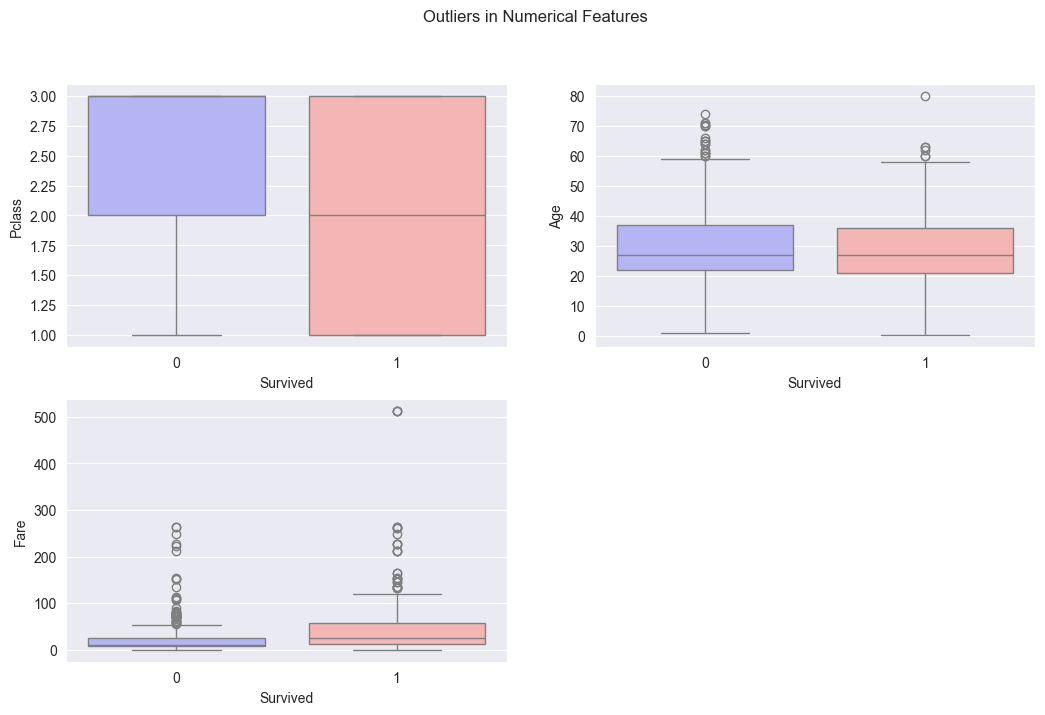

In [25]:
#check for outliers
figure, axes = plt.subplots(2, 2, figsize = (12.5, 7.5))
figure.suptitle("Outliers in Numerical Features")
figure.delaxes(axes[1][1])

sns.boxplot(ax = axes[0, 0], data = dataset, x = "Survived", y = "Pclass", palette = "bwr")
sns.boxplot(ax = axes[0, 1], data = dataset, x = "Survived", y = "Age", palette = "bwr")
sns.boxplot(ax = axes[1, 0], data = dataset, x = "Survived", y = "Fare", palette = "bwr")

#### Categorical encoding



In [26]:
#check categorical columns
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [27]:
#Pclass
print("Discrete values:\n", dataset["Pclass"].unique())

Discrete values:
 [3 1 2]


In [28]:
#sex
print("Column 'Sex' before encoding:")
print(dataset["Sex"][0:5])

dataset["Sex"].replace("female", 0, inplace = True)
dataset["Sex"].replace("male", 1, inplace = True)

print("Column 'Sex' after encoding:")
print(dataset["Sex"][0:5])

Column 'Sex' before encoding:
0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object
Column 'Sex' after encoding:
0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int64


In [29]:
#Embarked
print("Unique values:\n", dataset["Embarked"].unique())

Unique values:
 ['S' 'C' 'Q']


In [30]:
#function to encode 'Embarked'
def encode_embarked(column):

  for data in column:
    if data == 'S':
      column[column.index(data)] = 0
    elif data == 'C':
      column[column.index(data)] = 1
    else:
      column[column.index(data)] = 2

  return column

In [31]:
#implement function
print("Column 'Embarked' before encoding:")
print(dataset["Embarked"][0:5])

dataset["Embarked"] = encode_embarked(list(dataset["Embarked"]))

print("Column 'Embarked' after encoding:")
print(dataset["Embarked"][0:5])

Column 'Embarked' before encoding:
0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object
Column 'Embarked' after encoding:
0    0
1    1
2    0
3    0
4    0
Name: Embarked, dtype: int64


#### Visualizing feature target-dependence

In [32]:
dataset.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='Parch'>

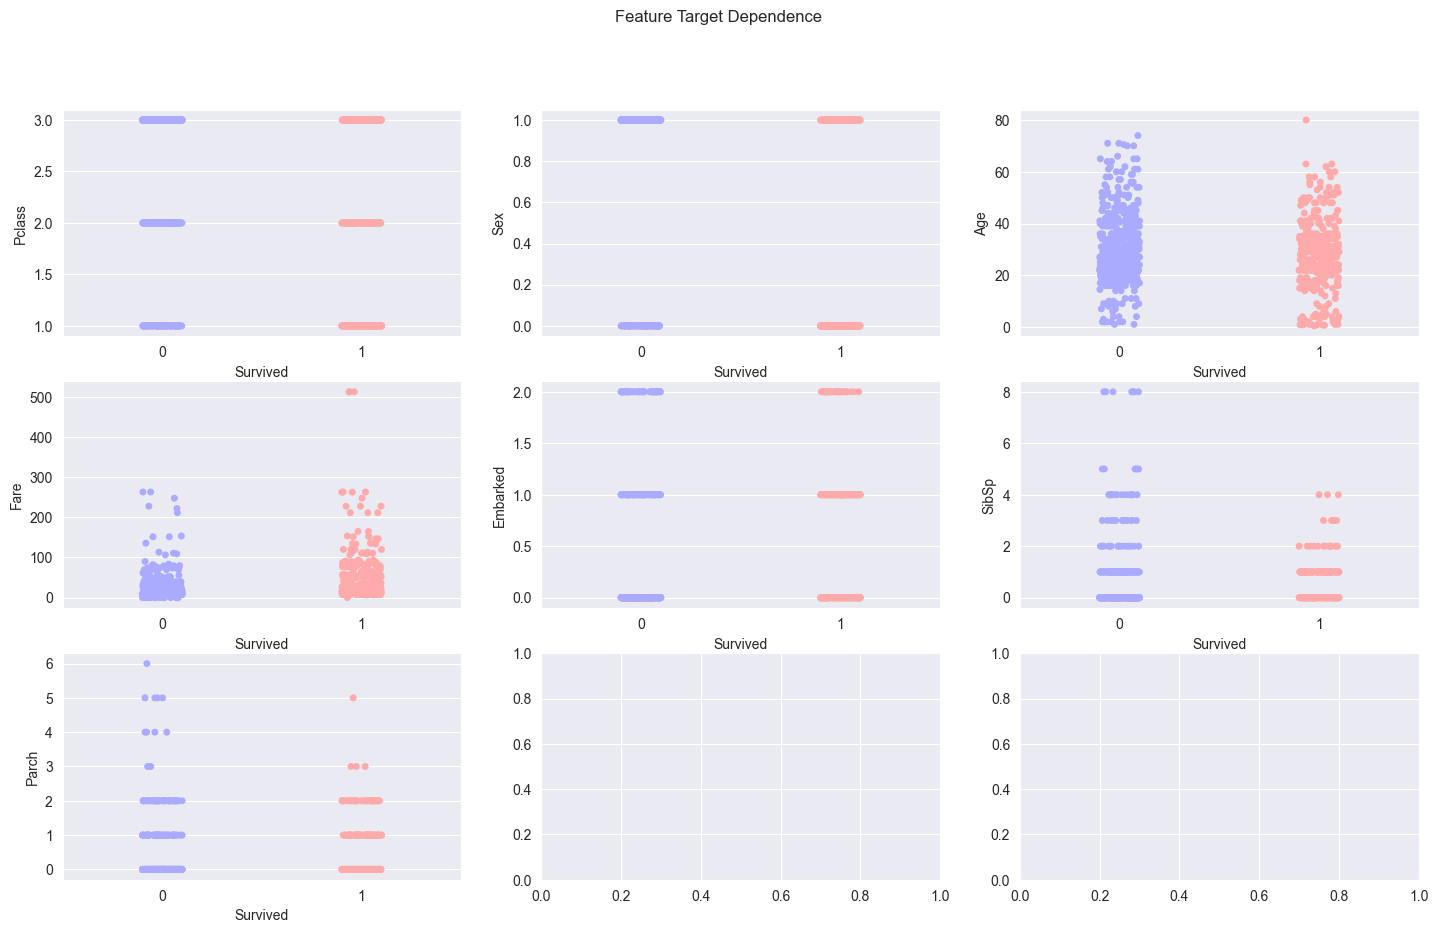

In [33]:
figure, axes = plt.subplots(3, 3, figsize = (17.5, 10))
#figure.delaxes(axes[1][2])
figure.suptitle("Feature Target Dependence")

#island
sns.stripplot(ax = axes[0, 0], data = dataset, x = "Survived", y = "Pclass", palette = "bwr")
sns.stripplot(ax = axes[0, 1], data = dataset, x = "Survived", y = "Sex", palette = "bwr")
sns.stripplot(ax = axes[0, 2], data = dataset, x = "Survived", y = "Age", palette = "bwr")
sns.stripplot(ax = axes[1, 0], data = dataset, x = "Survived", y = "Fare", palette = "bwr")
sns.stripplot(ax = axes[1, 1], data = dataset, x = "Survived", y = "Embarked", palette = "bwr")
sns.stripplot(ax = axes[1, 2], data = dataset, x = "Survived", y = "SibSp", palette = "bwr")
sns.stripplot(ax = axes[2, 0], data = dataset, x = "Survived", y = "Parch", palette = "bwr")

#### Splitting the data

In [34]:
#feature and target split
X = dataset.drop(columns = ["Survived"])
y = dataset["Survived"]
print("Size of dataset X : "+str(X.shape[0]))
print("Size of target dataset Y : "+str(y.shape[0]))
print("Number of features of dataset X : "+str(X.shape[1]))

Size of dataset X : 889
Size of target dataset Y : 889
Number of features of dataset X : 7


**Splitting into train , validation and test data using split 70-20-10**

In [35]:
x, x_val, y, y_val = train_test_split(X,y,test_size=0.2,train_size=0.8)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.125,train_size=0.875)

In [36]:
#check shape
print("Shape of training dataset x : " +"(" +str(x_train.shape[0])+","+str(x_train.shape[1])+")")
print("Shape of training dataset y : " +"(" +str(y_train.shape[0])+","+")")
print("Shape of test dataset x : " +"(" +str(x_test.shape[0])+","+str(x_test.shape[1])+")")
print("Shape of test dataset y : " +"(" +str(y_test.shape[0])+","+")")
print("Shape of validation dataset x : " +"(" +str(x_val.shape[0])+","+str(x_val.shape[1])+")")
print("Shape of validation dataset y : " +"(" +str(y_val.shape[0])+","+")")

Shape of training dataset x : (622,7)
Shape of training dataset y : (622,)
Shape of test dataset x : (89,7)
Shape of test dataset y : (89,)
Shape of validation dataset x : (178,7)
Shape of validation dataset y : (178,)


## Task-2

**Implementing entropy function**

Along with implementing entropy function as cost function we also implement functions that will calculate information gain and to find best split based on split feature and split threshold.

In [37]:
def entropy(y):
    # Count the number of occurences of each class
    count_positives = np.sum(y)
    count_negatives = len(y) - count_positives

    # Calculate the fraction of positives and negatives
    p_positive = count_positives / len(y)
    p_negative = count_negatives / len(y)

    # Avoid log(0)
    if p_positive == 0 or p_negative == 0:
        entropy = 0
    else:
        # Formula
        entropy = - p_positive * np.log(p_positive) - p_negative * np.log(p_negative)

    return entropy

#To calculate information gain
def info_gain(X, y, feature, threshold):
    # Split the data
    left_mask = X.iloc[:, feature] <= threshold
    right_mask = ~left_mask
    left_labels, right_labels = y[left_mask], y[right_mask]

    # Calculate the entropy for the subsets
    entropy_before_split = entropy(y)
    entropy_left = entropy(left_labels)
    entropy_right = entropy(right_labels)

    # Calculate information gain
    p_left = len(left_labels) / len(y)
    p_right = len(right_labels) / len(y)
    information_gain = entropy_before_split - (p_left * entropy_left + p_right * entropy_right)

    return information_gain

#To provide best split on a feature using split threshold provided by its output for that feature
def best_split(X, y):
  n_features = X.shape[1]
  best_feature, best_threshold, best_information_gain = None, None, -1

  for feature in range(n_features):
    thresholds = np.unique(X.iloc[:, feature])
    for threshold in thresholds:
      information_gain = info_gain(X, y, feature, threshold)

      # Update the best split
      if information_gain > best_information_gain:
        best_feature, best_threshold, best_information_gain = feature, threshold, information_gain

  return best_feature, best_threshold


## Task-3

Number of features

In [38]:
n_features=x_train.shape[1]
n_features

7

**Implementing contocat function to convert continuous variables to categorical variables**

In [39]:
def conTocat(data, target):
  categorical_data = data.copy()

  for feature in data.columns:
        # Find the best split for the feature
    best_split_value = best_split(data[[feature]], target)[1]

        # Convert continuous data to categorical based on the best split
    categorical_data[feature] = (data[feature] > best_split_value).astype(int)

  return categorical_data

#Converting training and test set variables into categorical variables from continuous variable
categorical_data = conTocat(x_train,y_train)
categorical_test_data=conTocat(x_test,y_test)

#Reindexing data
cat_data=categorical_data.reset_index(drop=True)
cat_test_data=categorical_test_data.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

**X_train with continuous variables**

In [40]:
x_train0=x_train.reset_index(drop=True)
x_train0.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,19.0,1,0,7.8542,0
1,3,1,27.0,0,0,7.2292,1
2,1,1,25.0,1,0,55.4417,1
3,2,1,47.0,0,0,15.0000,0
4,2,1,39.0,0,0,13.0000,0


**X_train after converting into categorical variable**

In [41]:
cat_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,1,0,0,0,0
1,1,1,1,0,0,0,1
2,0,1,1,0,0,1,1
3,0,1,1,0,0,0,0
4,0,1,1,0,0,0,0


## Task-4

**Implement make_shift function to split each feature column using best_split function which was implemented earlier**

In [42]:
def make_split(data, target, split_feature, split_value):
    left_mask = data.iloc[:,split_feature] <= split_value
    right_mask = data.iloc[:,split_feature] > split_value

    left_data = data[left_mask]
    left_target = target[left_mask]

    right_data = data[right_mask]
    right_target = target[right_mask]

    return left_data, left_target, right_data, right_target

**Implementing and making a decision tree with root node named 'root'**

In [43]:
class DecisionTreeNode:
    def __init__(self, feature=None, value=None, left=None, right=None, depth=0, label=None):
        self.feature = feature
        self.value = value
        self.left = left
        self.right = right
        self.depth = depth
        self.label = label

    def is_leaf_node(self):
        return self.value is not None

def build_tree(data, target, depth=0, max_depth=3):
    if len(np.unique(target)) == 1:
        return DecisionTreeNode(label=target.iloc[0], depth=depth)

    if depth == max_depth:
        return DecisionTreeNode(label=target.mode()[0], depth=depth)

    # Find the best split
    split_feature, split_value = best_split(data, target)

    # If no valid split was found, return a leaf
    if split_feature is None:
        return DecisionTreeNode(label=target.mode()[0], depth=depth)

    # Make the split
    left_data, left_target, right_data, right_target = make_split(data, target, split_feature, split_value)

    # If no split is possible, return a leaf
    if len(left_data) == 0 or len(right_data) == 0:
        return DecisionTreeNode(label=target.mode()[0], depth=depth)

    # Recursively build the left and right subtrees
    left_child = build_tree(left_data, left_target, depth + 1, max_depth)
    right_child = build_tree(right_data, right_target, depth + 1, max_depth)

    return DecisionTreeNode(feature=split_feature, value=split_value, left=left_child, right=right_child, depth=depth)

root = build_tree(cat_data,y_train, max_depth=5)

## Task-5

**Implementing infer function**

In [44]:
def infer(sample, tree):
    # Traverse the tree until a leaf node is reached
    current_node = tree
    while current_node.label is None:
        # Check the feature value of the sample against the split value
        if sample[current_node.feature] <= current_node.value:
            current_node = current_node.left
        else:
            current_node = current_node.right

    return current_node.label

## Task-6

**Implementing prediction function to predict output and is using decision tree for predicting output**

In [45]:
def predict(data0, tree):
    predictions = []
    for _, sample in data0.iterrows():
        predicted_class = infer(sample, tree)
        predictions.append(predicted_class)
    return predictions

#Predictions using prediction function
predictions = predict(cat_test_data, root)
predictions1= predict(cat_data,root)
print("Predictions for train sample:", predictions1)
print("Predictions for test sample:", predictions)

Predictions for train sample: [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

To calculate accuracy of prediction

In [46]:
def accuracy(prediction, actual):
    correct = 0
    total = len(prediction)

    for pred, act in zip(prediction, actual):
        if pred == act:
            correct += 1

    accuracy = (correct / total) * 100
    return accuracy


acc = accuracy(predictions,y_test)
acc1=accuracy(predictions1,y_train)

print("Overall Accuracy of training data:", acc1, "%")
print("Overall Accuracy of test data:", acc, "%")

Overall Accuracy of training data: 84.72668810289389 %
Overall Accuracy of test data: 67.41573033707866 %


In [48]:
def classwise_accuracy(prediction,actual):
  correct_zero = 0
  correct_one=0
  total = len(prediction)

  for pred, act in zip(prediction, actual):
    if pred == act==0:
      correct_zero += 1
    if pred == act==1:
      correct_one+=1

  accuracy_zero = (correct_zero / total) * 100
  accuracy_one= (correct_one / total) * 100
  return accuracy_zero,accuracy_one

acc_zero,acc_one = classwise_accuracy(predictions,y_test)
acc1_zero,acc1_one=classwise_accuracy(predictions1,y_train)
print("Classwise accuracy of training sample :")
print("For 'Not survived' :",acc1_zero)
print("For 'Survived' :",acc1_one)
print("Classwise accuracy of test sample :")
print("For 'Not survived' :",acc_zero)
print("For 'Survived' :",acc_one)

Classwise accuracy of training sample :
For 'Not survived' : 60.28938906752411
For 'Survived' : 24.437299035369776
Classwise accuracy of test sample :
For 'Not survived' : 46.06741573033708
For 'Survived' : 21.34831460674157


## Task-7

**Printing confusion matrix**

In [49]:
#Function to make confusion matrix
def confusion_matrix(predictions, actual):
    TP = FP = TN = FN = 0
    for pred, act in zip(predictions, actual):
        if pred == 1 and act == 1:
            TP += 1
        elif pred == 1 and act == 0:
            FP += 1
        elif pred == 0 and act == 1:
            FN += 1
        elif pred == 0 and act == 0:
            TN += 1

    cm = {'True Positive (TP)': TP, 'False Positive (FP)': FP, 'True Negative (TN)': TN, 'False Negative (FN)': FN}
    return cm

#Function to print confusion matrix
def print_matrix(cm):
    print("Confusion Matrix:")
    print(f"True Positives (TP): {cm['True Positive (TP)']}")
    print(f"False Positives (FP): {cm['False Positive (FP)']}")
    print(f"True Negatives (TN): {cm['True Negative (TN)']}")
    print(f"False Negatives (FN): {cm['False Negative (FN)']}")

cm = confusion_matrix(predictions,y_test)
print_matrix(cm)

Confusion Matrix:
True Positives (TP): 19
False Positives (FP): 10
True Negatives (TN): 41
False Negatives (FN): 19


## Task-8

Calculating Precision , Recall and F1 score on test data

In [50]:
def precision(predictions, actual):
  cm = confusion_matrix(predictions, actual)
  precision = cm['True Positive (TP)'] / (cm['True Positive (TP)'] + cm['False Positive (FP)'])
  return precision

def recall(predictions, actual):
  cm = confusion_matrix(predictions, actual)
  recall = cm['True Positive (TP)'] / (cm['True Positive (TP)'] + cm['False Negative (FN)'])
  return recall

def f1(predictions, actual):
  precision1=precision(predictions,actual)
  recall1=recall(predictions,actual)
  f1_score = 2 * (precision1 * recall1) / (precision1 + recall1)
  return f1_score

Precision=precision(predictions,y_test)
Recall=recall(predictions,y_test)
F1_score=f1(predictions,y_test)
print("Precision on test data :", Precision)
print("Recall (Sensitivity) on test data :", Recall)
print("F1-score on test data :", F1_score)

Precision on test data : 0.6551724137931034
Recall (Sensitivity) on test data : 0.5
F1-score on test data : 0.5671641791044776
